#### Problem: Cluster-based Unsupervised Anomaly Detection

Technique: DBSCAN

Language: Python

Library: DBSCAN (sklearn.cluster)

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. It finds core samples of high density and expands clusters from them. It is good for data which contains clusters of similar density.

Reference: https://towardsdatascience.com/outlier-detection-python-cd22e6a12098

Data Source at GitHub: https://github.com/JOPloume/outlier-detection-2D-feature-space/tree/master/datasets

### Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
import pandas as pd
from sklearn.cluster import DBSCAN
from collections import Counter

### Load Data

In [2]:
BASE = 'D:\\ResearchDataGtx1060\\AnomalyDetectionData\\'

In [3]:
# Reading in data (it has 2D Feature Space)
df = pd.read_csv(BASE+"wine-data.csv", header=None, sep=",")
df.head()

,0,1
0,3.06,5.64
1,2.76,4.38
2,3.24,5.68
3,3.49,7.80
4,2.69,4.32


### Visualizing the dataset (it has 2D feature space)

In [4]:
# Prepare data for visualisation

# Slicing array
array_flavanoids = np.array(df[0].values)

# Slicing array
array_colorintensity = np.array(df[1].values)

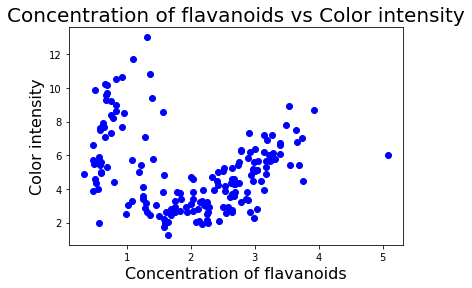

In [5]:
# Scatter plot function
plt.scatter(array_flavanoids, array_colorintensity, c='b', marker='o')
plt.xlabel('Concentration of flavanoids', fontsize=16)
plt.ylabel('Color intensity', fontsize=16)
plt.title('Concentration of flavanoids vs Color intensity', fontsize=20)
plt.show()

### Clustering data points
#### Purple colur points in the following figure are outliers

In [6]:
# Prepare data for clustering algorithm DBSCAN
data = df.iloc[:, 0:2].values

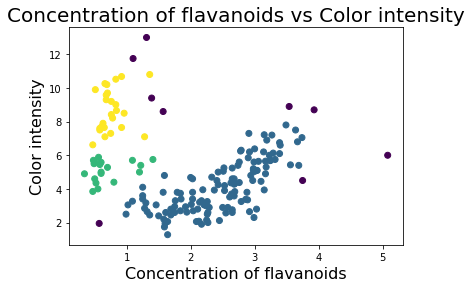

In [7]:
# DBSCAN model with parameters
model = DBSCAN(eps=0.6, min_samples=5).fit(data)

# Scatter plot function
colors = model.labels_ # (label value -1 is outlier and colour value -1 is purple)
plt.scatter(array_flavanoids, array_colorintensity, c=colors, marker='o')
plt.xlabel('Concentration of flavanoids', fontsize=16)
plt.ylabel('Color intensity', fontsize=16)
plt.title('Concentration of flavanoids vs Color intensity', fontsize=20)
plt.show()

### Calculating outliers.

In [8]:
# Creating Panda DataFrame with Labels for Outlier Detection
outlier_df = pd.DataFrame(data)

# Printing total number of values for each label
print(Counter(model.labels_))

# Printing DataFrame being considered as Outliers -1
print(outlier_df[model.labels_ == -1])

# Printing and Indicating which type of object outlier_df is
print(type(outlier_df))

# Exporting this DataFrame to CSV
outlier_df[model.labels_ == -1].to_csv(BASE+"dbscan-outliers.csv")

Counter({0: 125, 2: 25, 1: 19, -1: 9})
        0      1
18   3.93   8.70
49   3.54   8.90
59   0.57   1.95
98   3.75   4.50
121  5.08   6.00
149  1.39   9.40
150  1.57   8.60
158  1.31  13.00
159  1.10  11.75
<class 'pandas.core.frame.DataFrame'>
